# Generating plot with interpolated COP values for Heat Pump

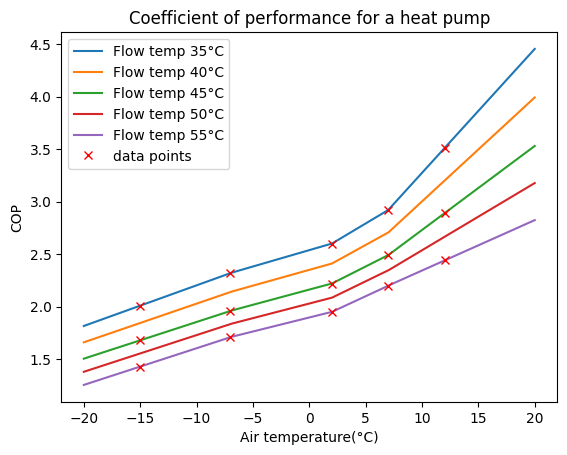

In [1]:
from Modules.Heating import Heat_Pump
# from scipy.interpolate import RegularGridInterpolator as Interpolator
import matplotlib.pyplot as plt
import numpy as np

Heat_Pump = Heat_Pump("Data/Heat_Pump/EcoAir622M/COP.csv")

COP_interp = Heat_Pump.interp_init("COP")

air_temp = np.linspace(-20, 20, 1000)
hydronics_temp = [35, 40, 45, 50, 55]

for output_temp in hydronics_temp:

    COP = Heat_Pump.Calculate_COP(output_temp, air_temp, COP_interp)
    
    plt.plot(air_temp, COP, label = 'Flow temp ' + str(output_temp) + '°C')
    
# data points
data_air_temp = np.array([12, 12, 12, 7, 7, 7, 2, 2, 2, -7, -7, -7, -15, -15, -15])
data_flow_temp = np.array([35, 45, 55, 35, 45, 55, 35, 45, 55, 35, 45, 55, 35, 45, 55])

data_COP = Heat_Pump.Calculate_COP(data_flow_temp, data_air_temp, COP_interp)

plt.plot(data_air_temp, data_COP, label = "data points", marker='x', color='red', linestyle='None')

plt.title('Coefficient of performance for a heat pump')
plt.xlabel('Air temperature(°C)')
plt.ylabel('COP')
plt.legend()

# Calculating annual electricity usage by heating system and effective SCOP

Total electricity usage 95561.79725426479 kWh/yr
Effective COP: 2.861148156020034


Text(0, 0.5, 'Capped heating requirement (kW)')

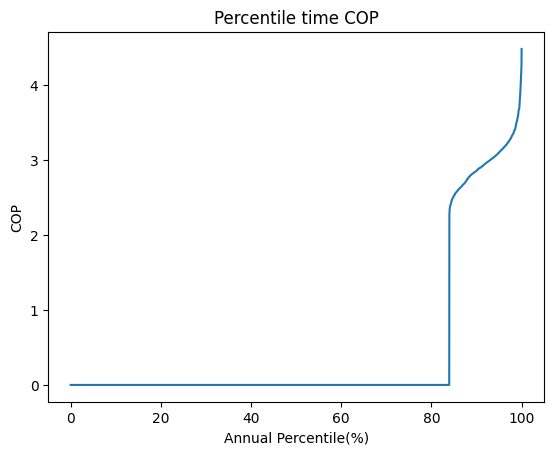

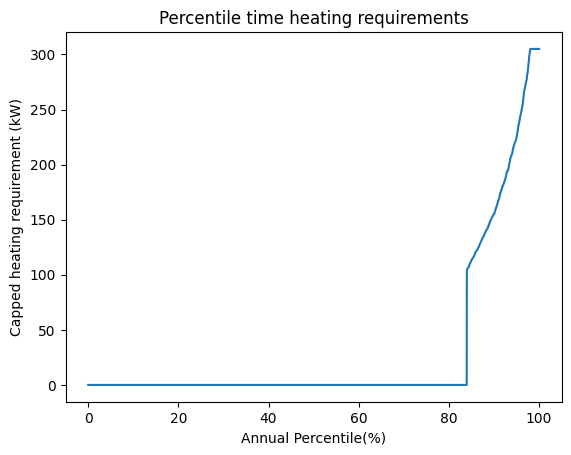

In [1]:
from Modules.Heating import Heat_Pump
from Modules.Heating import Controller
import numpy as np
import matplotlib.pyplot as plt

max_heat_pump_power = 305 # in kW

Heat_Pump = Heat_Pump("Data/Heat_Pump/EcoAir622M/COP.csv")

Controller = Controller(Heat_Pump, max_heat_pump_power)

time, heating, electricity, COP = Controller.controller()

print('Total electricity usage ' + str(np.sum(electricity)) + ' kWh/yr')

effective_COP = np.sum(heating) / np.sum(electricity)
print('Effective COP: ' + str(effective_COP))

# When heating is zero set COP to 0
indices = [i for i, x in enumerate(heating) if x == 0]
COP[indices] = 0

plt.figure(0)
plt.plot(100 * time / np.max(time), np.sort(COP))
plt.title("Percentile time COP")
plt.xlabel('Annual Percentile(%)')
plt.ylabel('COP')
# plt.figure(1)
# plt.plot(time, heating)
# plt.figure(2)
# plt.plot(time, electricity)
plt.figure(3)
plt.plot(100 * time / np.max(time), np.sort(heating))
# plt.plot(99, 305, marker='x', color='red')
plt.title('Percentile time heating requirements')
plt.xlabel('Annual Percentile(%)')
plt.ylabel('Capped heating requirement (kW)')

In [3]:
import Modules.Data as Data

# Data.column_from_csv(self.tool_output_data, "External temperture (ºC)") 
print(np.min(Data.column_from_csv("Data/XL-BES-Tool_Output.csv" , "External temperture (ºC)")))

-19.4
